# K-Means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Data

In [2]:
N = 100 # number of samples
D = 2 # number of features/dimensions

N_0 = int(N/2) # number of samples for class 0
N_1 = int(N/2) # number of samples for class 1

mu_0 = [-2,-2]
variance = 1

mu_1 = [2,2]

m_cov = [[variance, 0],
         [0, variance]]

In [3]:
np.random.seed(41) # make the results reproducible
X = np.concatenate([np.random.multivariate_normal(mu_0, m_cov, N_0),
                    np.random.multivariate_normal(mu_1, m_cov, N_1)],
                   axis=0)
X.shape

(100, 2)

The labels:

In [4]:
T = np.array([0]*N_0 + [1]*N_1)

Scatter plot:

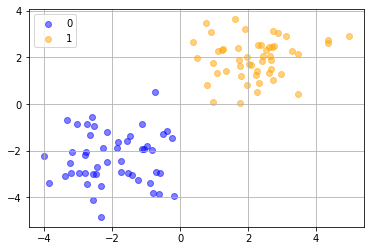

In [5]:
colors = ['blue', 'orange']
for i, color in enumerate(colors):
    i_samples = X[T == i]
    plt.scatter(i_samples[:,0], i_samples[:,1], c=color, alpha=0.5, label=str(i))

plt.legend()
plt.grid(True)
plt.show()

## The Algorithm

$k$: The number of clusters
1. Randomly assign positions for the initial $k$-means
2. Assign each data sample to the mean to which it is closest
3. If no sample's assignment has changed, stop and keep the clusters. Otherwise re-calculate the means based on the new assignments and repeat from step 2

In [6]:
K=2

1. The Initial $k$-means

In [7]:
def squared_distance(x, y):
    return np.sum((y-x)**2)

In [8]:
def vector_mean(vecs):
    np.mean(vecs, axis=1)

In [9]:
def assign_label(sample):
    return min(range(K), key=lambda i: squared_distance(sample, means[i]))

In [10]:
means = X[np.random.randint(len(X), size=K),:]
means

array([[-0.63214899, -3.85873942],
       [ 1.96203785,  2.01285565]])

In [11]:
max_n_iter = 100
assignments = None

n_iter = 0
while True:
    new_assignments = np.apply_along_axis(func1d=assign_label, axis=1, arr=X)

    if np.array_equal(assignments, new_assignments):
        break

    assignments = new_assignments

    for i in range(K):
        # find all the points assigned to cluster i

        i_samples = X[assignments == i]

        if len(i_samples) > 0:
            means[i] = np.mean(i_samples, axis=0)
    n_iter += 1
    if n_iter >= max_n_iter:
        break

In [12]:
assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

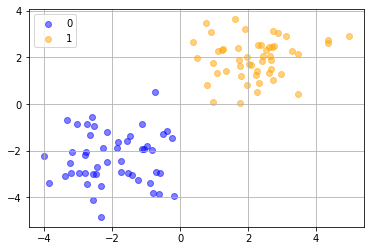

In [13]:
colors = ['blue', 'orange']
for k in range(K):
    i_samples = X[assignments == k]
    plt.scatter(i_samples[:,0], i_samples[:,1], c=colors[k], alpha=0.5, label=str(k))
plt.legend()
plt.grid(True)
plt.show()

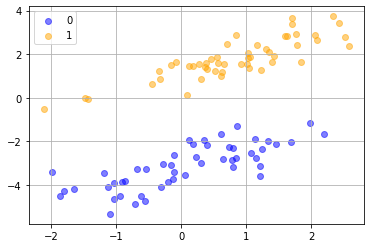

In [17]:
mu_0 = [0,-3]
variance = 1

mu_1 = [1,2]

m_cov = [[1, 0.8],
         [0.8, 1]]

np.random.seed(41) # make the results reproducible
X = np.concatenate([np.random.multivariate_normal(mu_0, m_cov, N_0),
                    np.random.multivariate_normal(mu_1, m_cov, N_1)],
                   axis=0)
X.shape

T = np.array([0]*N_0 + [1]*N_1)

colors = ['blue', 'orange']
for i, color in enumerate(colors):
    i_samples = X[T == i]
    plt.scatter(i_samples[:,0], i_samples[:,1], c=color, alpha=0.5, label=str(i))

plt.legend()
plt.grid(True)
plt.show()

In [18]:
K=2

In [19]:
means = X[np.random.randint(len(X), size=K),:]
means

array([[-0.70987239, -4.88544242],
       [ 1.03194875,  2.04007937]])

In [20]:
max_n_iter = 100
assignments = None

n_iter = 0
while True:
    new_assignments = np.apply_along_axis(func1d=assign_label, axis=1, arr=X)

    if np.array_equal(assignments, new_assignments):
        break

    assignments = new_assignments

    for i in range(K):
        # find all the points assigned to cluster i

        i_samples = X[assignments == i]

        if len(i_samples) > 0:
            means[i] = np.mean(i_samples, axis=0)
    n_iter += 1
    if n_iter >= max_n_iter:
        break

In [21]:
assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [22]:
means

array([[ 0.02742679, -3.07375287],
       [ 0.88512332,  1.84741264]])

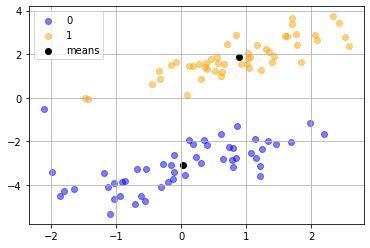

In [23]:
colors = ['blue', 'orange']
for k in range(K):
    i_samples = X[assignments == k]
    plt.scatter(i_samples[:,0], i_samples[:,1], c=colors[k], alpha=0.5, label=str(k))
plt.scatter(means[:,0], means[:,1], c='black', label='means')
plt.legend()
plt.grid(True)
plt.show()